# Multicategory Perceptron Training Algorithm
***Author: Pratyush Bagaria (pbagar2@uic.edu)***

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

training_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
training_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
w = np.random.uniform(-1,1,size=(10,784))

In [156]:
def u_function(M):
    i = 0
    u = np.empty([10,1])
    for val in M:
        if val >= 0:
            u[i] = 1.0
        else:
            u[i] = 0.0
        i += 1
    return u

In [157]:
def networkTrainAlgo(w, n, eta, epsilon, training_images, training_labels):
    epoch = 0
    train_errors = []
    while(True):
        train_errors.append(0)
        for i in range(n):  
            xi = training_images[i]
            xi.resize(784, 1)
            v = np.matmul(w,xi)
            label = v.argmax(axis=0)
            if(label != training_labels[i]):
                train_errors[epoch] = train_errors[epoch] + 1
        epoch = epoch + 1    
        
        ## loop to update the weights ##
        for i in range(n):
            xi = training_images[i]
            xi.resize(784, 1)
            u = np.array(u_function(np.matmul(w,xi)))
            dxi = np.zeros((1,10)).T
            dxi[training_labels[i]] = 1
            dxi_minus_u = np.subtract(dxi, u)
            p = np.multiply(dxi_minus_u, np.transpose(xi))
            w = w + eta*p
        ## while loop terminates when algorithm converges or when number of epoch is 100
        ## when training data is quite high, eta is 1 and epsilon is 0 then
        ## there are high chances of algorithm not getting converged
        ## making while loop run infinitely, so max. epochs is set to 100
        if(train_errors[epoch - 1]/n <= epsilon or epoch==100):
            break
    return w, train_errors

In [158]:
def networkTestAlgo(W, test_images, test_labels):
    test_errors = 0  
    for i in range(len(test_images)):  
        xi = test_images[i]
        xi.resize(784, 1)
        vPrime = np.matmul(W ,xi)
        label = vPrime.argmax(axis=0)
        if(label != test_labels[i]):
            test_errors = test_errors + 1
    print('Error Count on Test data:',test_errors)
    print('Error Percentage:', test_errors*100/len(test_images))

In [159]:
def plotGraph(train_errors):
    plt.title('\nepoch number VS number of misclassification (Train Errors)\n')
    plt.ylabel('\nnumber of misclassification (Train Errors)\n')
    plt.xlabel('\nepoch number\n')
    plt.plot(range(len(train_errors)), train_errors, color = 'b')
    plt.show()

In [160]:
def compareAndPlotGraphs(train_errors_1, train_errors_2, train_errors_3):
    plt.subplot(1, 3, 1)
    plt.plot(range(len(train_errors_1)), train_errors_1)
    plt.xlabel('\nepoch number\n (for W1)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)

    plt.subplot(1, 3, 2)
    plt.plot(range(len(train_errors_2)), train_errors_2)
    plt.xlabel('\nepoch number\n (for W2)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)


    plt.subplot(1, 3, 3)
    plt.plot(range(len(train_errors_3)), train_errors_3)
    plt.xlabel('\nepoch number\n (for W3)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)

    plt.tight_layout(rect=[0, 0, 5, 2])
    plt.show()

##### Results when n=50, eta=1 and epsilon = 0 below:

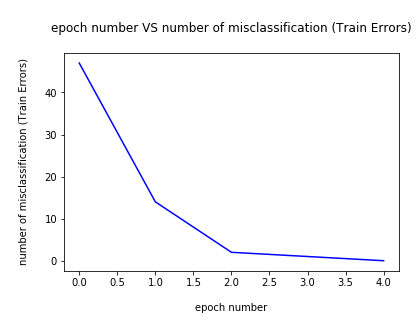

Error Count on Test data: 4353
Error Percentage: 43.53


In [172]:
n = 50
eta = 1
epsilon = 0.0
W, train_errors = networkTrainAlgo(w, n, eta, epsilon, training_images, training_labels)
plotGraph(train_errors)
networkTestAlgo(W, n, test_images, test_labels)

##### Results when n=1000, eta=1 and epsilon = 0 below:

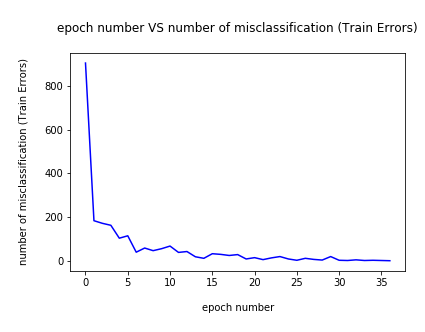

Error Count on Test data: 1764
Error Percentage: 17.64


In [173]:
n = 1000
eta = 1
epsilon = 0.0
W, train_errors = networkTrainAlgo(w, n, eta, epsilon, training_images, training_labels)
plotGraph(train_errors)
networkTestAlgo(W, n, test_images, test_labels)

##### Results when n=60000, eta=1 and epsilon = 0 below:

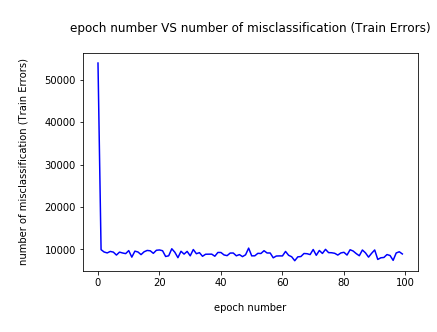

Error Count on Test data: 1504
Error Percentage: 15.04


In [174]:
n = 60000
eta = 1
epsilon = 0.0
W, train_errors = networkTrainAlgo(w, n, eta, epsilon, training_images, training_labels)
plotGraph(train_errors)
networkTestAlgo(W, n, test_images, test_labels)

<br>

##### Results when n=60000, eta=1, epsilon = 0.15 and three different randomly assigned weights for three runs:


***Below are the graphs obtained on training data***


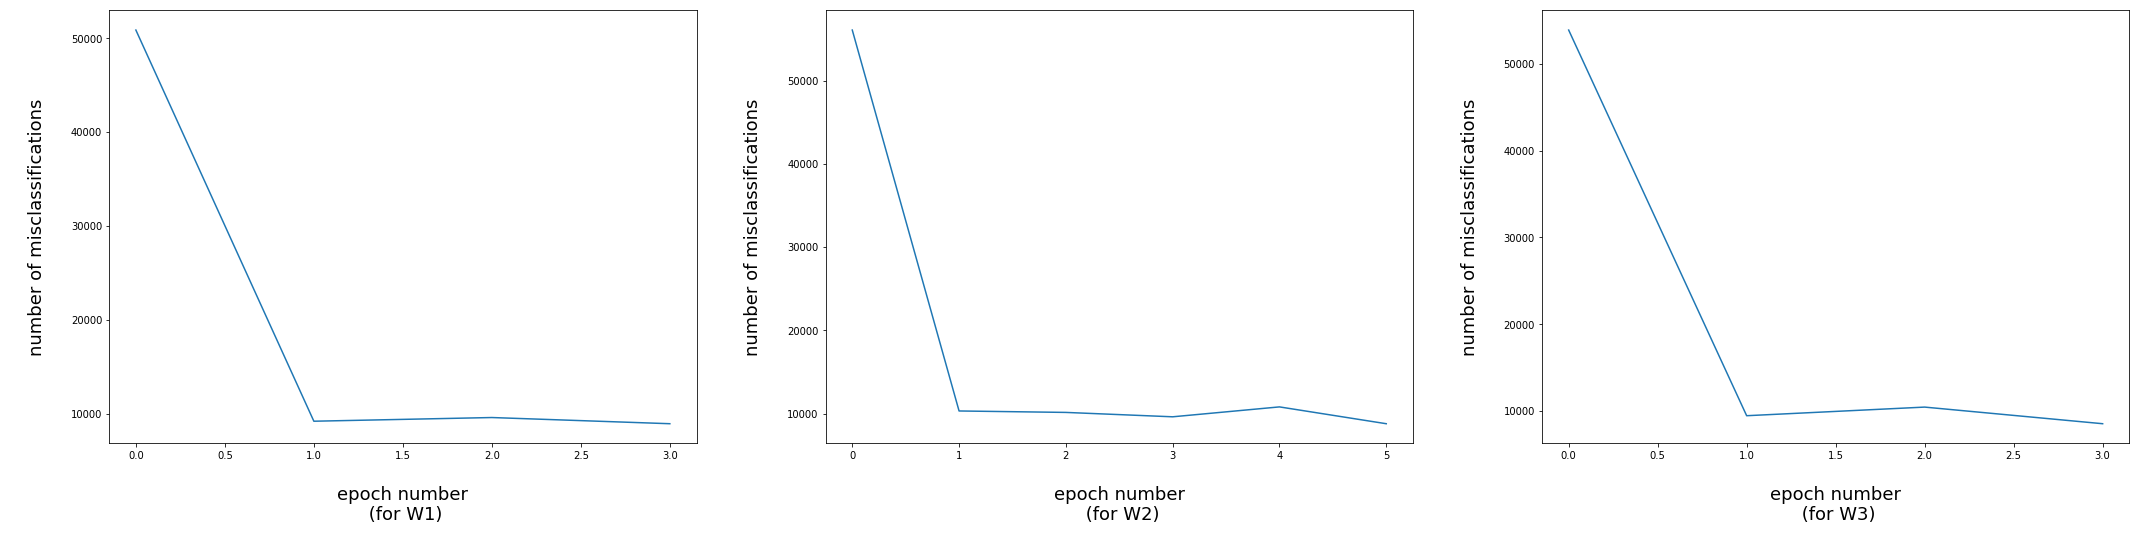


***Below are the results obtained on test data***

Run #1 - When w1 was initial weights for training
Error Count on Test data: 1545
Error Percentage: 15.45

Run #2 - When w2 was initial weights for training
Error Count on Test data: 1560
Error Percentage: 15.6

Run #3 - When w3 was initial weights for training
Error Count on Test data: 1609
Error Percentage: 16.09


In [166]:
### considering three different weights as w1, w2 and w3 for three different runs
w1 = np.random.uniform(-1,1,size=(10,784))
w2 = np.random.uniform(-1,1,size=(10,784))
w3 = np.random.uniform(-1,1,size=(10,784))
n = 60000
eta = 1
epsilon = 0.15
W1, train_errors_1 = networkTrainAlgo(w1, n, eta, epsilon, training_images, training_labels)
W2, train_errors_2 = networkTrainAlgo(w2, n, eta, epsilon, training_images, training_labels)
W3, train_errors_3 = networkTrainAlgo(w3, n, eta, epsilon, training_images, training_labels)
print ("\n***Below are the graphs obtained on training data***")
compareAndPlotGraphs(train_errors_1, train_errors_2, train_errors_3)
print ("\n***Below are the results obtained on test data***")
print ("\nRun #1 - When w1 was initial weights for training")
networkTestAlgo(W1, test_images, test_labels)
print ("\nRun #2 - When w2 was initial weights for training")
networkTestAlgo(W2, test_images, test_labels)
print ("\nRun #3 - When w3 was initial weights for training")
networkTestAlgo(W3, test_images, test_labels)

#### Observations:
1. __Error percentage is 43.53 on the test images when n=50.__ The error percentage is quite high for test images because the network was trained on a small set of 50 training images which converged in 4 epochs and zero training errors.
2. __Error percentage is 17.64 on the test images when n=1000.__ The error percentage reduced to a great extent compared with what was obtained when n was 50. This is because the network learned more number of training samples and convereged in 36 epochs with zero training errors. Though 1000 samples were also not enough so there is ~18% error rate on test images.
3. __Error percentage is 15.04 on the test images when n=60000.__ The error percentage insignificantly reduced from ~18% to ~15%  but this was achieved when number of epochs reached 100 and further there was no hope of algorithm to converge. From the graph it can be inferred that the number of misclassifications is around 6000 to 12000 after 1st epoch or in other words error percentage on training images is near around 15% in all the epochs greater than 1.
4. __Error percentage is 15.45, 15.6 & 16.09 on the test images for n=60000, η=1, Ɛ=0.15 and when the algorithm was run thrice on 3 different initial weights.__ It was hence observed that choosing η and Ɛ appropriately the algorithm converges in finite number of epochs even for 60,000 test images irrespective of the number of times the algorithm is run with different randomly assigned initial weights (3, 5 and 3 epochs in this case for w1, w2 and w3 respectively). Moreover, it is noticed that the error percentage on test images hovers around 15% to 18% in all the cases except the case when the test images was 50.